In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [3]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [4]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.97


In [5]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.01563096, 0.04713941, 0.01611853, 0.0157578 , 0.0317347 ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [6]:
import pandas as pd

In [7]:
red_df = pd.DataFrame(res)
display(red_df)
print("Mean times and scores: \n", red_df.mean())

,fit_time,score_time,test_score,train_score
0,0.015631,0.0,0.966667,0.966667
1,0.047139,0.0,1.000000,0.966667
2,0.016119,0.0,0.933333,0.983333
3,0.015758,0.0,0.966667,0.983333
4,0.031735,0.0,1.000000,0.975000


Mean times and scores: 
 fit_time       0.025276
score_time     0.000000
test_score     0.973333
train_score    0.975000
dtype: float64


In [8]:
print("Метки ирисов: \n{}".format(iris.target))

Метки ирисов: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
import mglearn

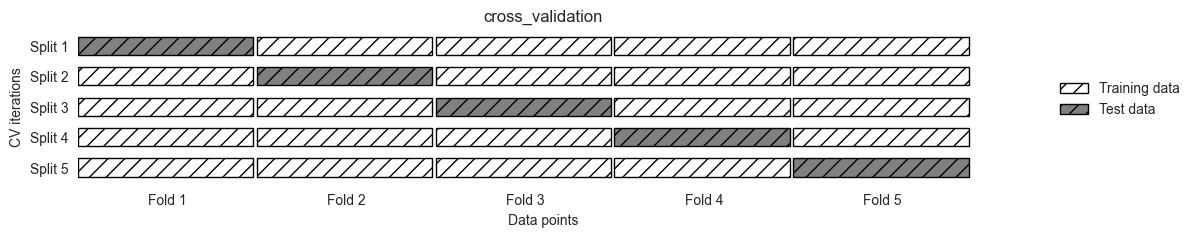

In [10]:
mglearn.plots.plot_cross_validation()

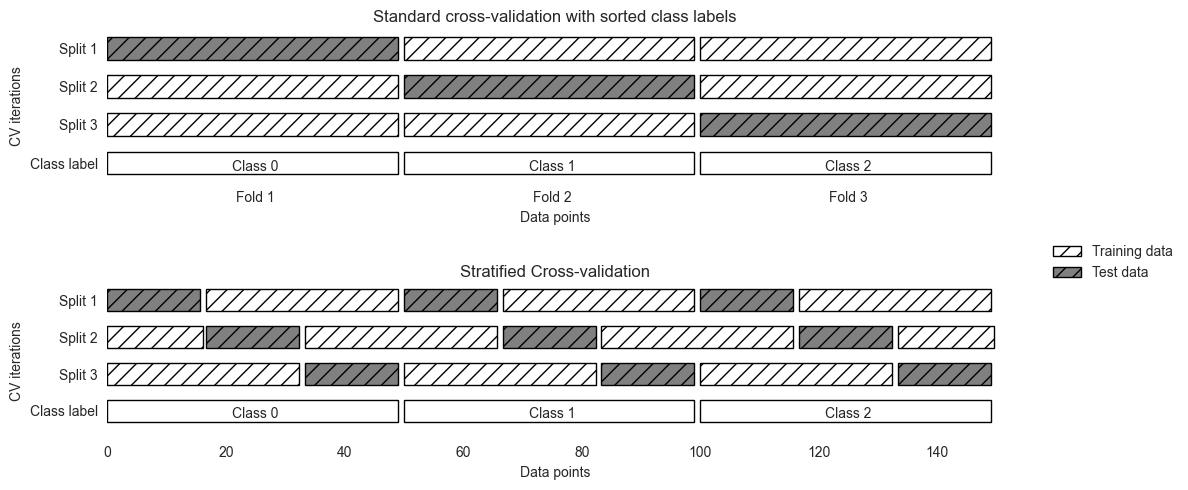

In [11]:
mglearn.plots.plot_stratified_cross_validation()

In [12]:
from sklearn.model_selection import KFold

In [13]:
kfold = KFold(n_splits=5)

In [14]:
print("Значения правильности перекрестной проверки: \n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки: 
[1.         1.         0.86666667 0.93333333 0.83333333]


In [15]:
kfold3 = KFold(n_splits=3)
print("Значения правильности перекрестной проверки: \n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold3)))

Значения правильности перекрестной проверки: 
[0. 0. 0.]


In [16]:
kfold2 = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки: \n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold2)))

Значения правильности перекрестной проверки: 
[0.98 0.96 0.96]


In [17]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Количества итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количества итераций:  150
Средняя правильность: 0.97


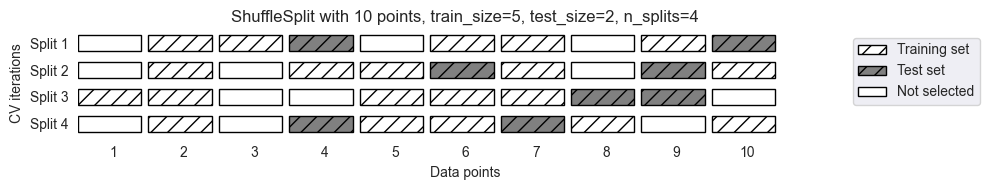

In [18]:
mglearn.plots.plot_shuffle_split()

In [19]:
from sklearn.model_selection import ShuffleSplit

In [20]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Значение проверки перекрестной проверки: \n{}".format(scores))

Значение проверки перекрестной проверки: 
[0.96       0.98666667 0.94666667 0.97333333 0.98666667 0.93333333
 0.96       0.93333333 0.93333333 1.        ]


In [21]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

In [22]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups=groups, scoring=None, cv=GroupKFold(n_splits=3))
print("Значение проверки перекрестной проверки: \n{}".format(scores))

Значение проверки перекрестной проверки: 
[0.75       0.6        0.66666667]


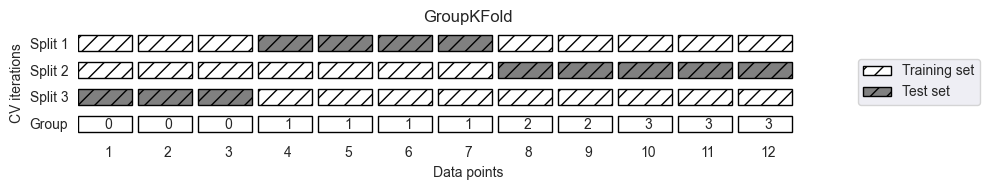

In [23]:
mglearn.plots.plot_group_kfold()

In [24]:
# реализация наивного решетчатого поиска from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0) 
print("Paзмep обучашего набора: {} размер тестового Haбoра: {}".format(X_train.shape[0], X_test .shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        #evaluate the SVC on the test set
        score = svm.score (X_test, y_test)
        # if we got a better score, store the score and parameters 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Haилучшее значение правильности: {:.2f}".format(best_score)) 
print("Нaилучшие значения параметров: {}".format(best_parameters))

Paзмep обучашего набора: 112 размер тестового Haбoра: 38
Haилучшее значение правильности: 0.97
Нaилучшие значения параметров: {'C': 100, 'gamma': 0.001}


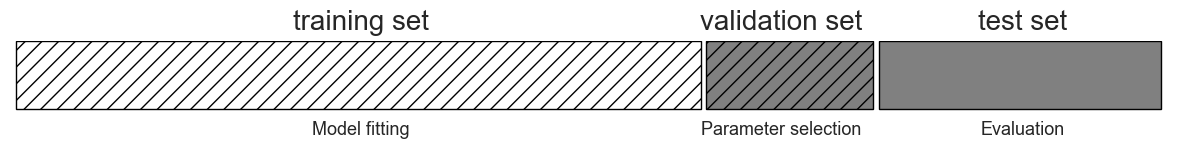

In [26]:
mglearn.plots.plot_threefold_split()

In [27]:
from sklearn.svm import SVC
# разбиваем данные на обучающий+проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" "{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих
# и проверочных данных, оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 84 размер проверочного набора: 28 размер тестового набора:38

Лучшее значение правильности на проверочном наборе: 0.96
Наилучшие значения параметров:  {'C': 10, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.92


In [28]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров, # обучаем ЅѴС
        svm = SVC(gamma=gamma, C=C)
        # выполняем перекрестную проверку
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # вычисляем среднюю правильность перекрестной проверки
        score = np.mean(scores)
        # если получаем лучшее значение правильности, сохраняем значение и параметры 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате
# объединения обучающих и проверочных данных
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval) 

SVC(C=10, gamma=0.1)

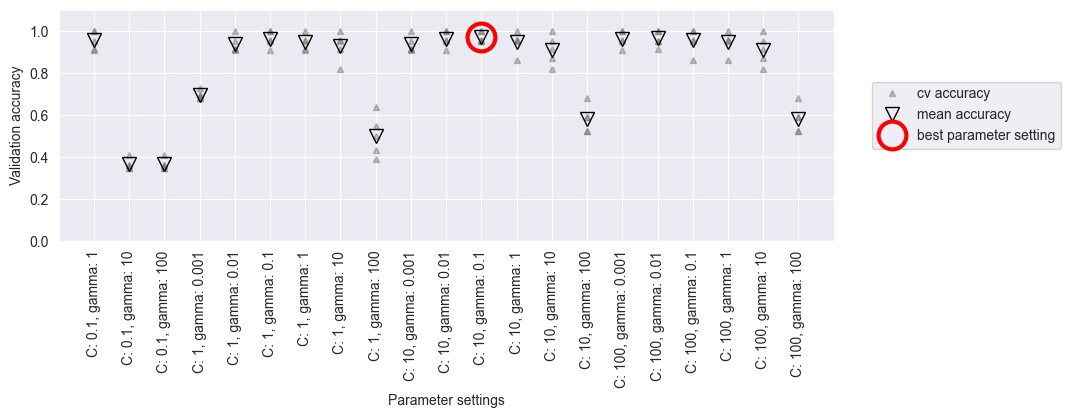

In [29]:
mglearn.plots.plot_cross_val_selection()

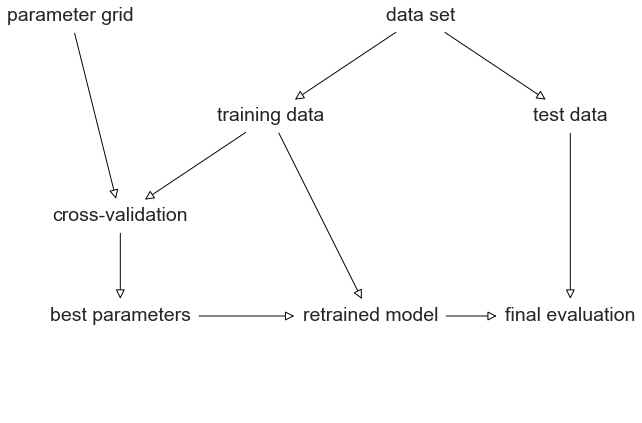

In [30]:
mglearn.plots.plot_grid_search_overview()

In [31]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100],
              "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}
print("Сетка параметров: \n{}".format(param_grid))

Сетка параметров: 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [35]:
print("Correctness on the test set: {:.2f}".format(grid_search.score(X_test, y_test)))

Correctness on the test set: 0.97


In [36]:
print("The best score of parameters: {}".format(grid_search.best_params_))
print("The best score of cross_val correctness: {:.2f}".format(grid_search.best_score_))

The best score of parameters: {'C': 100, 'gamma': 0.01}
The best score of cross_val correctness: 0.98


In [37]:
print("The best model: \n{}".format(grid_search.best_estimator_))

The best model: 
SVC(C=100, gamma=0.01)


In [38]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003128,0.006255,0.000000,0.000000,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,22
1,0.000000,0.000000,0.003125,0.006249,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,22
2,0.000843,0.001361,0.000288,0.000575,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,22
3,0.001820,0.003640,0.001202,0.002404,0.001,1,"{'C': 0.001, 'gamma': 1}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,22
4,0.000000,0.000000,0.001604,0.003208,0.001,10,"{'C': 0.001, 'gamma': 10}",0.352941,0.352941,0.294118,0.470588,0.6875,0.431618,0.140200,31


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
scores = np.array(results.mean_test_score).reshape(6, 6)

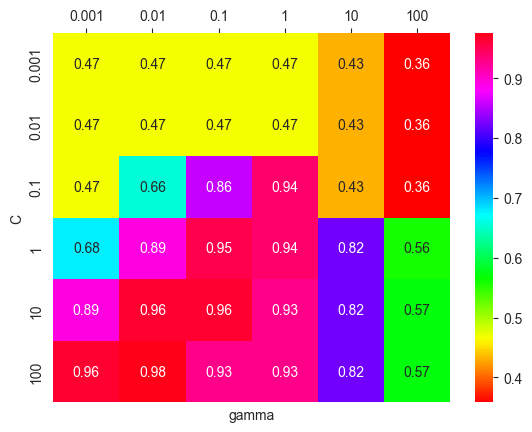

In [40]:
ax = sns.heatmap(scores, annot=True, xticklabels=param_grid["gamma"], yticklabels=param_grid["C"], cmap="hsv")
ax.set(xlabel="gamma", ylabel="C")
ax.xaxis.tick_top()
plt.show()

In [41]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids: \n{}".format(param_grid))

List of grids: 
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [42]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("The best score of parameters: {}".format(grid_search.best_params_))
print("The best score of cross_val correctness: {:.2f}".format(grid_search.best_score_))

The best score of parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
The best score of cross_val correctness: 0.98


In [43]:
results = pd.DataFrame(grid_search.cv_results_)

In [44]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000355,0.000710,0.000497,0.000631,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,27
1,0.000000,0.000000,0.000000,0.000000,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,27
2,0.000000,0.000000,0.000000,0.000000,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,27
3,0.003128,0.006257,0.000000,0.000000,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,27
4,0.000000,0.000000,0.000000,0.000000,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.352941,0.352941,0.294118,0.470588,0.6875,0.431618,0.140200,37
5,0.003125,0.006249,0.000000,0.000000,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.352941,0.352941,0.294118,0.352941,0.4375,0.358088,0.045778,40
6,0.000000,0.000000,0.000000,0.000000,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,27
7,0.000000,0.000000,0.000000,0.000000,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,27
8,0.000000,0.000000,0.003120,0.006240,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,27
9,0.000000,0.000000,0.000000,0.000000,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.352941,0.352941,0.294118,0.647059,0.6875,0.466912,0.165498,27


In [45]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print(scores)
print(scores.mean())

[0.96666667 1.         0.9        0.96666667 1.        ]
0.9666666666666668


In [46]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
# для каждого разбиения данных во внешней перекрестной проверке
# (метод split возвращает индексы)
    for training_samples, test_samples in outer_cv.split(X, y):
# находим наилучшие параметры с помощью внутренней перекрестной проверки
        best_parms = {}
        best_score = -np.inf
        # итерируем по параметрам
        for parameters in parameter_grid:
            # собираем значения правильности по всем внутренним разбиениям
            cv_scores = []
            # итерируем по разбиениям внутренней перекрестной проверки
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
            # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # вычисляем среднее значение правильности по внутренним блокам
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры
                best_score = mean_score
                best_params = parameters
# строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [48]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [49]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [50]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Correctness on the test set: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [False]
Correctness on the test set: 0.90


In [51]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Correctness on the test set: {:.2f}".format(tree.score(X_test, y_test)))

Correctness on the test set: 0.92


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("правильность dummy: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train) 
pred_logreg = logreg.predict(X_test)
print("правильность lоgгеg: {:.2f}".format(logreg.score(X_test, y_test)))

правильность dummy: 0.90
правильность lоgгеg: 0.98


In [54]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix: \n{}".format(confusion))

Confusion matrix: 
[[402   1]
 [  6  41]]


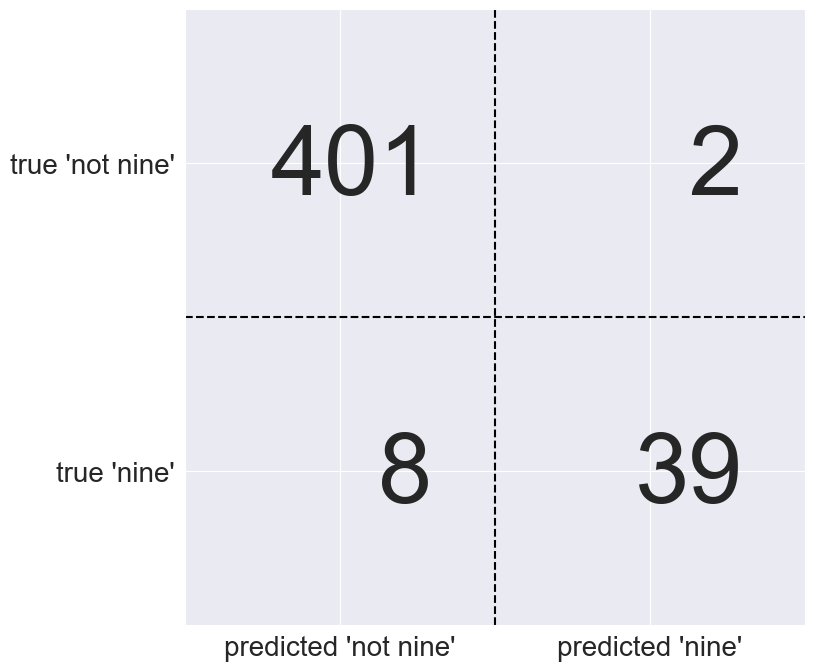

In [55]:
mglearn.plots.plot_confusion_matrix_illustration()

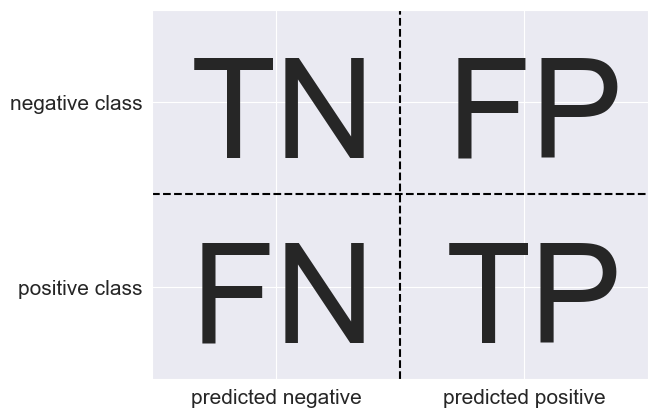

In [56]:
mglearn.plots.plot_binary_confusion_matrix()

In [57]:
print("Наиболее часто встречающийся класс:") 
print(confusion_matrix(y_test, pred_most_frequent))
print("\n Дамми-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\n дерево решений:")
print(confusion_matrix(y_test, pred_tree))
print("\n логистическая регрессия")
print(confusion_matrix(y_test, pred_logreg))

Наиболее часто встречающийся класс:
[[403   0]
 [ 47   0]]

 Дамми-модель:
[[403   0]
 [ 47   0]]

 дерево решений:
[[390  13]
 [ 24  23]]

 логистическая регрессия
[[402   1]
 [  6  41]]


In [58]:
from sklearn.metrics import f1_score
print("f1-мepa наибольшая частота: {:.2f}".format(f1_score (y_test, pred_most_frequent))) 
print("f1-мepa дамми: {:.2f}".format(f1_score (y_test, pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score (y_test, pred_tree)))
print("f1-мepа логистическая регресcия: {:.2f}".format(f1_score (y_test, pred_logreg)))

f1-мepa наибольшая частота: 0.00
f1-мepa дамми: 0.00
f1-мера дерево: 0.55
f1-мepа логистическая регресcия: 0.92


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450


C:\Users\Aiana Sagynbek\PycharmProjects\bigDataLabs\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aiana Sagynbek\PycharmProjects\bigDataLabs\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aiana Sagynbek\PycharmProjects\bigDataLabs\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [60]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

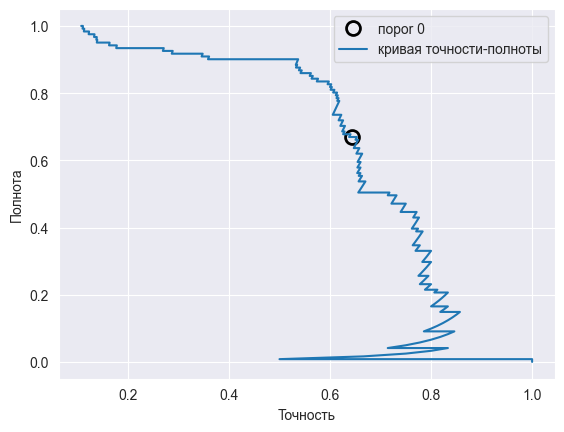

In [61]:
# используем больший объем данных, чтобы получить более гладкую кривую 
X, y = make_blobs (n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test)) 
# находим ближайший к нулю порог
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="пopor 0",
fillstyle="none", c='k', mew=2)

plt.plot (precision, recall, label="кривая точности-полноты")
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc= "best")

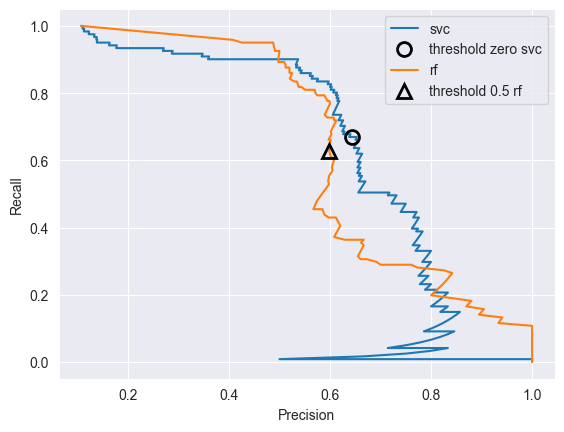

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], "o", markersize=10, label="threshold zero svc", fillstyle="none", c="k", mew=2)

plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], "^", c="k", markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [63]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1]) 
ap_svc = average_precision_score(y_test, svc.decision_function(X_test)) 
print("Средняя точность гandom forest: {:.3f}".format(ap_rf))
print("Средняя точность SVс: {:.3f}".format(ap_svc))

Средняя точность гandom forest: 0.660
Средняя точность SVс: 0.666


In [64]:
from sklearn.metrics import accuracy_score 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred= lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score (y_test, pred))) 
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


C:\Users\Aiana Sagynbek\PycharmProjects\bigDataLabs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


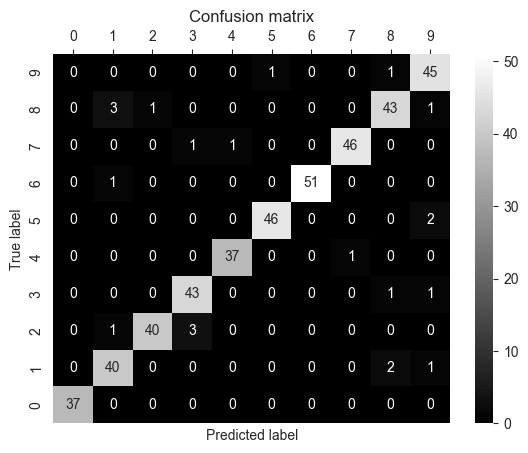

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
# строим тепловую карту средних значений правильности перекрестной проверки
ax = sns.heatmap (confusion_matrix(y_test, pred), annot=True, xticklabels=digits.target_names, yticklabels=digits.target_names, cmap='gray')
ax.set(xlabel='Predicted label', ylabel="True label")
ax.xaxis.tick_top()
plt.title("Confusion matrix")
plt.gca().invert_yaxis()
plt.show()

In [66]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450


In [67]:
print("Micro average f1 score: {:.3f}".format(
f1_score (y_test, pred, average="micro"))) 
print("Macro average f1 score: {:.3f}".format(
f1_score (y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


In [68]:
# метрика качества классификационной модели по умолчанию правильность
print("Метрика качества по умолчанию: {}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))
# значение параметра scoring="accuracy" не меняет результатов
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9., scoring="accuracy")
print("Метрика качества явно заданная правильность: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc") 
print("Метрика качества AUC: {}".format(roc_auc))


Метрика качества по умолчанию: [0.975      0.99166667 1.         0.99442897 0.98050139]
Метрика качества явно заданная правильность: [0.975      0.99166667 1.         0.99442897 0.98050139]
Метрика качества AUC: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [69]:
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)
# задаем не самую удачную сетку параметров для иллюстрации:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# используем метрику по умолчанию, то есть правильность:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Решетчатый поиск с использованием правильности")
print("Наилучшие параметры:", grid.best_params_)
print("Наилучшее значение перекр проверки (правильность)): {:.3f}".format(grid.best_score_)) 
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

Решетчатый поиск с использованием правильности
Наилучшие параметры: {'gamma': 0.0001}
Наилучшее значение перекр проверки (правильность)): 0.976
AUC на тестовом наборе: 0.992
Правильность на тестовом наборе: 0.973


In [70]:
# используем метрику качества AUC:
grid = GridSearchCV (SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\n решетчатый поиск с использованием АИС")
print("Нaилучшие параметры:", grid.best_params_)
print("Hаилучшее значение перекр проверки (AUC): {:.3f}".format(grid.best_score_))
print("AUC Hа Tестовом наборе: {:.3f}".format(roc_auc_score (y_test, grid.decision_function (X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score (X_test, y_test)))


 решетчатый поиск с использованием АИС
Нaилучшие параметры: {'gamma': 0.01}
Hаилучшее значение перекр проверки (AUC): 0.998
AUC Hа Tестовом наборе: 1.000
Правильность на тестовом наборе: 1.000
